 <p style="font-size:150%;font-weight:bold;text-align:center">🐚 ABALONE AGE PREDICTION (2 part) 🐚</p>

<p style="font-size:120%;font-weight:bold;text-align:left">1. Importing</p>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Импортируем чистый csv датасет, полученный в результате манипуляций при EDA

In [2]:
df = pd.read_csv('data/abalone_clear.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Age             4177 non-null   float64
dtypes: float64(8), object(1)
memory usage: 293.8+ KB


In [3]:
df.sample(5)

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
1741,M,0.680,0.520,0.195,1.4535,0.592,0.3910,0.4125,11.5
1691,I,0.625,0.470,0.155,1.1955,0.643,0.2055,0.3145,13.5
704,M,0.400,0.300,0.125,0.4170,0.191,0.0900,0.1175,10.5
3744,I,0.275,0.425,0.065,0.1010,0.041,0.0210,0.0340,6.5
107,F,0.500,0.400,0.125,0.6675,0.261,0.1315,0.2200,11.5


<p style="font-size:120%;font-weight:bold;text-align:left">2. Построение моделей на числовых признаках</p>

<p style="font-size:120%;font-weight:bold;text-align:left">Naive Bayes</p>

In [4]:
# Импорт библиотек
from sklearn.model_selection import train_test_split
# Так как решается задача регрессии, то буду использовать не GaussianNB, а BayesianRidge
from sklearn.linear_model import BayesianRidge
from sklearn.metrics import mean_absolute_error

In [5]:
# Убираем целевую колонку с возрастом и категориальную с полом
X = df.drop(['Age', 'Sex'], axis=1)
y = df['Age']

In [6]:
# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [7]:
# Инициализация модели регрессии наивного Байесовского классификатора
nb_model = BayesianRidge()

In [8]:
# Обучение модели на обучающих данных
nb_model.fit(X_train, y_train)

BayesianRidge()

In [9]:
# Предсказание на тестовых данных
y_pred = nb_model.predict(X_test)

In [10]:
# Оценка качества модели (в данном случае, средняя абсолютная ошибка)
mae_nb = mean_absolute_error(y_test, y_pred)

In [11]:
print(f'NB Mean Absolute Error: {mae_nb}')

NB Mean Absolute Error: 1.6647148877943254


Не очень понятно как оценить полученное значение, попробую интерпретировать его по-другому

In [12]:
# Посмотрим насколько процентов в среднем разница между предсказанным и фактическим, для этого посчитаю MPE (Mean Percentage Error)
mpe_nb = (mae_nb / np.mean(y_test)) * 100

print(f'NB Mean Percentage Error: {mpe_nb:.4f}%')

NB Mean Percentage Error: 14.6798%


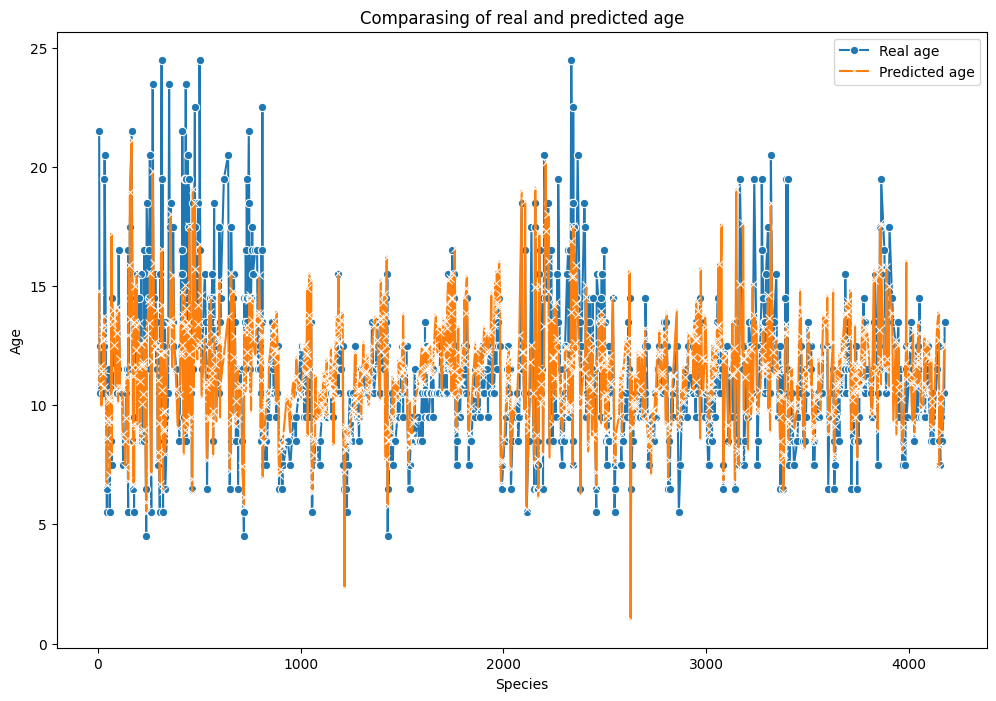

In [13]:
# И еще проверим как на графике выглядят предсказанные данные с фактическим

df_compare = pd.DataFrame({'Real age': y_test, 'Predicted age': y_pred})
plt.figure(figsize=(12, 8))
sns.lineplot(x=df_compare.index, y='Real age', data=df_compare, label='Real age', marker='o')
sns.lineplot(x=df_compare.index, y='Predicted age', data=df_compare, label='Predicted age', marker='x')
plt.title('Comparasing of real and predicted age')
plt.xlabel('Species')
plt.ylabel('Age')
plt.legend()
plt.show()


Выглядит понятнее, результат не слишком точный, в среднем разница фактического и предсказаного 14.68%, что вполне предсказуемо, потому что NB не предназначен для решения задач регресии

<p style="font-size:120%;font-weight:bold;text-align:left">K-Nearest Neighbors, KNN</p>

In [14]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor

In [15]:
df = pd.read_csv('data/abalone_clear.csv')
X = df.drop(['Age', 'Sex'], axis=1)
y = df['Age']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [16]:
# Нормализуем признаки (рекомендуется для KNN)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [17]:
# Создаем и обучаем модель KNN регрессии
knn_regressor = KNeighborsRegressor(n_neighbors=3)  
knn_regressor.fit(X_train_scaled, y_train)

# Делаем предсказания
y_pred = knn_regressor.predict(X_test_scaled)

# Оцениваем модель
mae_knn = mean_absolute_error(y_test, y_pred)
print(f'KNN MAE: {mae_knn:.4f}')

mpe_knn = (mae_knn / np.mean(y_test)) * 100
print(f'Mean Percentage Error: {mpe_knn:.4f}%')

KNN MAE: 1.7270
Mean Percentage Error: 15.2286%


Метод ближайших соседей сработал даже хуже байеса, но стоит попробовать подобрать гиперпараметры для лучшего результата

<p style="font-size:120%;font-weight:bold;text-align:left">KNN + GridSearch</p>

In [18]:
from sklearn.model_selection import GridSearchCV

In [19]:
param_grid = {
    'n_neighbors': range(1, 10),
    'weights': ['uniform', 'distance'],  # 'uniform' - все соседи равнозначны, 'distance' - веса обратно пропорциональны расстоянию
    'metric': ['euclidean', 'manhattan']  # Различные метрики расстояния
}

# Создаем объект GridSearchCV
grid_search = GridSearchCV(knn_regressor, param_grid, cv=5, scoring='neg_mean_absolute_error', verbose=2)

# Проводим поиск по сетке с кросс-валидацией
grid_search.fit(X_train_scaled, y_train)

# Выводим лучшие параметры и результаты
print("Best params:", grid_search.best_params_)
print("Best MAE on train data:", -grid_search.best_score_)

# Делаем предсказания на тестовых данных с лучшей моделью
best_knn_model = grid_search.best_estimator_
y_pred = best_knn_model.predict(X_test_scaled)

# Оцениваем модель на тестовых данных
mae_knn_best = mean_absolute_error(y_test, y_pred)
print(f'MAE: {mae_knn_best:.4f}')
mpe_knn_best = (mae_knn_best / np.mean(y_test)) * 100
print(f'Mean Percentage Error: {mpe_knn_best:.4f}%')

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] END ...metric=euclidean, n_neighbors=1, weights=uniform; total time=   0.0s
[CV] END ...metric=euclidean, n_neighbors=1, weights=uniform; total time=   0.0s
[CV] END ...metric=euclidean, n_neighbors=1, weights=uniform; total time=   0.0s
[CV] END ...metric=euclidean, n_neighbors=1, weights=uniform; total time=   0.0s
[CV] END ...metric=euclidean, n_neighbors=1, weights=uniform; total time=   0.0s
[CV] END ..metric=euclidean, n_neighbors=1, weights=distance; total time=   0.0s
[CV] END ..metric=euclidean, n_neighbors=1, weights=distance; total time=   0.0s
[CV] END ..metric=euclidean, n_neighbors=1, weights=distance; total time=   0.0s
[CV] END ..metric=euclidean, n_neighbors=1, weights=distance; total time=   0.0s
[CV] END ..metric=euclidean, n_neighbors=1, weights=distance; total time=   0.0s
[CV] END ...metric=euclidean, n_neighbors=2, weights=uniform; total time=   0.0s
[CV] END ...metric=euclidean, n_neighbors=2, we

[CV] END ...metric=manhattan, n_neighbors=2, weights=uniform; total time=   0.0s
[CV] END ...metric=manhattan, n_neighbors=2, weights=uniform; total time=   0.0s
[CV] END ...metric=manhattan, n_neighbors=2, weights=uniform; total time=   0.0s
[CV] END ...metric=manhattan, n_neighbors=2, weights=uniform; total time=   0.0s
[CV] END ...metric=manhattan, n_neighbors=2, weights=uniform; total time=   0.0s
[CV] END ..metric=manhattan, n_neighbors=2, weights=distance; total time=   0.0s
[CV] END ..metric=manhattan, n_neighbors=2, weights=distance; total time=   0.0s
[CV] END ..metric=manhattan, n_neighbors=2, weights=distance; total time=   0.0s
[CV] END ..metric=manhattan, n_neighbors=2, weights=distance; total time=   0.0s
[CV] END ..metric=manhattan, n_neighbors=2, weights=distance; total time=   0.0s
[CV] END ...metric=manhattan, n_neighbors=3, weights=uniform; total time=   0.0s
[CV] END ...metric=manhattan, n_neighbors=3, weights=uniform; total time=   0.0s
[CV] END ...metric=manhattan

MAE: 1.57
Mean Percentage Error: 13.86%
Удалось немного улучшить результат, но точность все равно не высокая

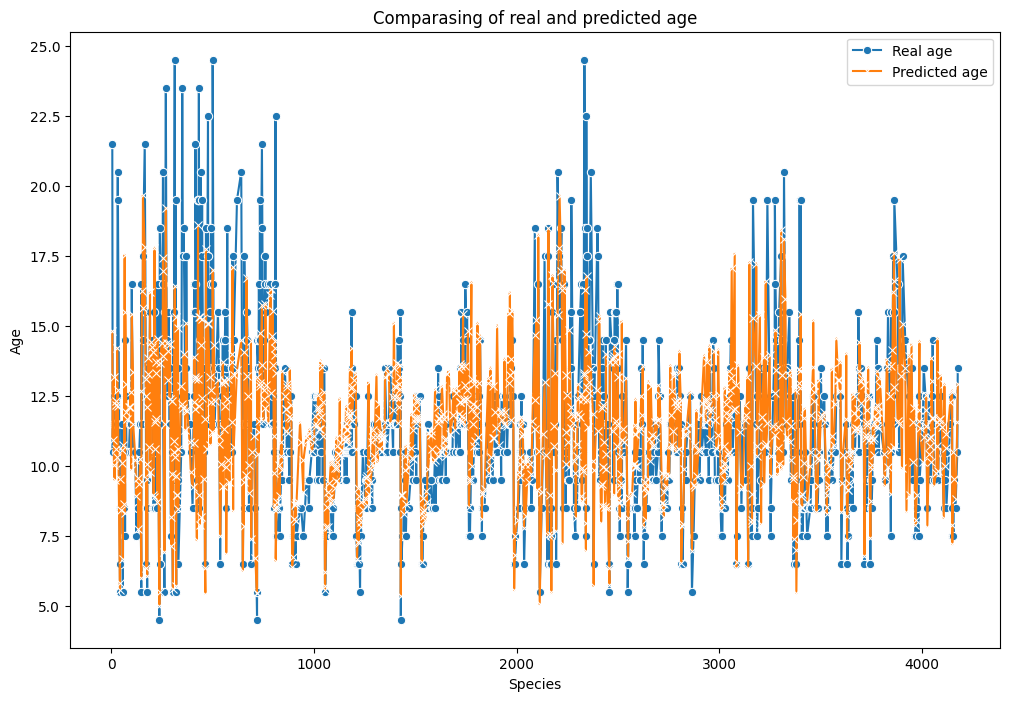

In [20]:
# Для интереса посмотрим на график

df_compare = pd.DataFrame({'Real age': y_test, 'Predicted age': y_pred})
plt.figure(figsize=(12, 8))
sns.lineplot(x=df_compare.index, y='Real age', data=df_compare, label='Real age', marker='o')
sns.lineplot(x=df_compare.index, y='Predicted age', data=df_compare, label='Predicted age', marker='x')
plt.title('Comparasing of real and predicted age')
plt.xlabel('Species')
plt.ylabel('Age')
plt.legend()
plt.show()


Меня не слишком устраивает точность предсказания, так что попробую обучить модель линейной регрессии

<p style="font-size:120%;font-weight:bold;text-align:left">Linear Regression</p>

In [21]:
from sklearn.linear_model import LinearRegression

In [22]:
df = pd.read_csv('data/abalone_clear.csv')
X = df.drop(['Age', 'Sex'], axis=1)
y = df['Age']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [23]:
# Создаем и обучаем модель линейной регрессии
linear_reg_model = LinearRegression()
linear_reg_model.fit(X_train, y_train)

# Делаем предсказания на тестовых данных
y_pred_linear_reg = linear_reg_model.predict(X_test)

# Оценка производительности модели
mae_linear = mean_absolute_error(y_test, y_pred_linear_reg)
print(f'MAE: {mae_linear:.4f}')

mpe_linear = (mae_linear / np.mean(y_test)) * 100
print(f'Mean Percentage Error: {mpe_linear:.4f}%')

MAE: 1.6652
Mean Percentage Error: 14.6838%


Результат сравним с knn, думаю, можно попробовать Random Forest

<p style="font-size:120%;font-weight:bold;text-align:left">Random Forest Regressor</p>

In [24]:
from sklearn.ensemble import RandomForestRegressor

df = pd.read_csv('data/abalone_clear.csv')

X = df.drop(['Age', 'Sex'], axis=1)
y = df['Age']

# Разделяем на тренировочный и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Создаем и обучаем модель Random Forest с параметрами по умолчанию
random_forest_model = RandomForestRegressor(random_state=42)
random_forest_model.fit(X_train, y_train)

# Делаем предсказания на тестовых данных
y_pred_random_forest = random_forest_model.predict(X_test)

# Оцениваем производительность модели
mae_random_forest = mean_absolute_error(y_test, y_pred_random_forest)
print(f'MAE Random Forest: {mae_random_forest:.4f}')
mpe_random_forest = (mae_random_forest / np.mean(y_test)) * 100
print(f'Mean Percentage Error: {mpe_random_forest:.4f}%')

MAE Random Forest: 1.5973
Mean Percentage Error: 14.0851%


Вероятно, получится улучшить результат при подборе гиперпараметров

In [25]:
# Создаем и обучаем модель Random Forest
random_forest_model = RandomForestRegressor(random_state=42)

# Определение параметров для Grid Search
param_grid = {
    'max_depth': [4, 7, 10], 'max_features': [0.7, 0.8, 0.9], 'n_estimators': [150, 200, 250]
}

grid_search = GridSearchCV(random_forest_model, param_grid, cv=5, scoring='neg_mean_absolute_error', verbose=2)

grid_search.fit(X_train, y_train)


# Вывод лучших параметров и результатов
print("Best params:", grid_search.best_params_)

# Делаем предсказания на тестовых данных с лучшей моделью
best_model_random_forest = grid_search.best_estimator_
y_pred_random_forest = best_model_random_forest.predict(X_test)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV] END ....max_depth=4, max_features=0.7, n_estimators=150; total time=   0.2s
[CV] END ....max_depth=4, max_features=0.7, n_estimators=150; total time=   0.2s
[CV] END ....max_depth=4, max_features=0.7, n_estimators=150; total time=   0.2s
[CV] END ....max_depth=4, max_features=0.7, n_estimators=150; total time=   0.2s
[CV] END ....max_depth=4, max_features=0.7, n_estimators=150; total time=   0.3s
[CV] END ....max_depth=4, max_features=0.7, n_estimators=200; total time=   0.3s
[CV] END ....max_depth=4, max_features=0.7, n_estimators=200; total time=   0.3s
[CV] END ....max_depth=4, max_features=0.7, n_estimators=200; total time=   0.3s
[CV] END ....max_depth=4, max_features=0.7, n_estimators=200; total time=   0.3s
[CV] END ....max_depth=4, max_features=0.7, n_estimators=200; total time=   0.3s
[CV] END ....max_depth=4, max_features=0.7, n_estimators=250; total time=   0.4s
[CV] END ....max_depth=4, max_features=0.7, n_e

Лучшие параметры для модели только с числовыми признаками
Best params: {'max_depth': 10, 'max_features': 0.7, 'n_estimators': 200}

In [26]:
# Оцениваем производительность модели
mae_random_forest_best = mean_absolute_error(y_test, y_pred_random_forest)
print(f'MAE Random Forest Best: {mae_random_forest_best:.4f}')
mpe_random_forest_best = (mae_random_forest_best / np.mean(y_test)) * 100
print(f'Mean Percentage Error: {mpe_random_forest_best:.4f}%')

MAE Random Forest Best: 1.5485
Mean Percentage Error: 13.6547%


Результат получился лучшим из всех моделях, хоть и очень близок с knn

In [27]:
print(f'MAE KNN Best = {mae_knn_best:.4f}')
print(f'MAE RFR Best = {mae_random_forest_best:.4f}')

MAE KNN Best = 1.5719
MAE RFR Best = 1.5485


На удивление, полученные результаты не сильно отличаются. Даже BayesianRidge сработал неплохо по сравнению с другими. На мой взгяд точность предсказывания все равно оставляет желать лучшего. У меня есть подозрения, что нужно использовать другие модели или же разбить возрасть морских ушек на группы и решать задачу классификации. Или же более высокая точность невозможна при текущем наборе данных. Далее попробую включить категориальную колонку пола в обучение, может она что-то изменит.

Так как Random Forest Regression сработал лучше всех, дальше будем работать с ним

<p style="font-size:120%;font-weight:bold;text-align:left">3. Построение модели на числовых и категориальных признаках</p>

In [28]:
df = pd.read_csv('data/abalone_clear.csv')

# Преобразование категориального признака "Sex" с использованием One-Hot Encoding
df = pd.get_dummies(df, columns=['Sex'], prefix='Sex', drop_first=True)

# Разделение данных на признаки (X) и целевую переменную (y)
X = df.drop('Age', axis=1)
y = df['Age']

# Разделение на тренировочный и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Создание и обучение модели RandomForestRegressor с оптимальными параметрами
random_forest_model = RandomForestRegressor(max_depth=10, max_features=0.7, n_estimators=200, random_state=42)
random_forest_model.fit(X_train, y_train)

# Делаем предсказания на тестовых данных
y_pred = random_forest_model.predict(X_test)

# Оцениваем производительность модели
mae = mean_absolute_error(y_test, y_pred)
print(f'MAE Random Forest: {mae:.4f}')
mpe = (mae/ np.mean(y_test)) * 100
print(f'Mean Percentage Error: {mpe:.4f}%')


MAE Random Forest: 1.5362
Mean Percentage Error: 13.5468%


Отлично, добавление категориального признака улучшило качество модели для выбранных GridSearch параметров. Дла интереса я хочу проверить, можно ли улучшить результат еще сильнее. Попробую еще раз поискать параметры.

In [29]:
df = pd.read_csv('data/abalone_clear.csv')

# Преобразование категориального признака "Sex" с использованием One-Hot Encoding
df = pd.get_dummies(df, columns=['Sex'], prefix='Sex', drop_first=True)

# Разделение данных на признаки (X) и целевую переменную (y)
X = df.drop('Age', axis=1)
y = df['Age']

# Разделение на тренировочный и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Создаем и обучаем модель Random Forest
random_forest_model = RandomForestRegressor(random_state=42)

# Определение параметров для Grid Search
param_grid = {
    'max_depth': [4, 7, 10], 'max_features': [0.7, 0.8, 0.9], 'n_estimators': [170, 200, 230]
}

grid_search = GridSearchCV(random_forest_model, param_grid, cv=5, scoring='neg_mean_absolute_error', verbose=2)

grid_search.fit(X_train, y_train)

# Вывод лучших параметров и результатов
print("Best params:", grid_search.best_params_)

# Делаем предсказания на тестовых данных с лучшей моделью
best_model_random_forest = grid_search.best_estimator_
y_pred = best_model_random_forest.predict(X_test)

# Оцениваем производительность модели
mae = mean_absolute_error(y_test, y_pred)
print(f'MAE Random Forest Best: {mae:.4f}')
mpe = (mae / np.mean(y_test)) * 100
print(f'Mean Percentage Error: {mpe:.4f}%')

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV] END ....max_depth=4, max_features=0.7, n_estimators=170; total time=   0.3s
[CV] END ....max_depth=4, max_features=0.7, n_estimators=170; total time=   0.3s
[CV] END ....max_depth=4, max_features=0.7, n_estimators=170; total time=   0.3s
[CV] END ....max_depth=4, max_features=0.7, n_estimators=170; total time=   0.3s
[CV] END ....max_depth=4, max_features=0.7, n_estimators=170; total time=   0.3s
[CV] END ....max_depth=4, max_features=0.7, n_estimators=200; total time=   0.4s
[CV] END ....max_depth=4, max_features=0.7, n_estimators=200; total time=   0.3s
[CV] END ....max_depth=4, max_features=0.7, n_estimators=200; total time=   0.3s
[CV] END ....max_depth=4, max_features=0.7, n_estimators=200; total time=   0.3s
[CV] END ....max_depth=4, max_features=0.7, n_estimators=200; total time=   0.4s
[CV] END ....max_depth=4, max_features=0.7, n_estimators=230; total time=   0.4s
[CV] END ....max_depth=4, max_features=0.7, n_e

Получилось еще на чуть-чуть улучшить модель

Best params: {'max_depth': 10, 'max_features': 0.7, 'n_estimators': 230}

Теперь подробнее рассмотрим метрики

In [30]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, root_mean_squared_error

In [31]:
# Вычисление метрик

# Делаем предсказания на тренировочных данных с лучшей моделью
y_train_pred = best_model_random_forest.predict(X_train)

# Вычисляем метрики для тренировочных данных
mae_train = mean_absolute_error(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = root_mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

# Вывод результатов для тренировочных данных
print('Train data:')
print(f'MAE: {mae_train:.4f}')
print(f'MSE: {mse_train:.4f}')
print(f'RMSE: {rmse_train:.4f}')
print(f'R2: {r2_train:.4f}')

print()

# Вывод результатов для тестовых данных
print('Test data:')
mae = mean_absolute_error(y_test, y_pred)
print(f'MAE: {mae:.4f}')
mse = mean_squared_error(y_test, y_pred)
print(f'MSE: {mse:.4f}')
rmse = root_mean_squared_error(y_test, y_pred)
print(f'RMSE: {rmse:.4f}')
r2 = r2_score(y_test, y_pred)
print(f'R2: {r2:.4f}')

Train data:
MAE: 0.9964
MSE: 1.7828
RMSE: 1.3352
R2: 0.8290

Test data:
MAE: 1.5352
MSE: 4.6876
RMSE: 2.1651
R2: 0.5443


<b>Mean Absolute Error (MAE)</b>
* Оценка: MAE измеряет среднюю абсолютную ошибку между фактическими и предсказанными значениями. Чем ближе MAE к нулю, тем лучше. Высокие значения MAE могут указывать на значительные ошибки модели.
* Переобучение: Если MAE на тренировочных данных существенно меньше, чем на тестовых, это может свидетельствовать о переобучении.

<b>Mean Squared Error (MSE)</b>
* Оценка: MSE измеряет среднюю квадратичную ошибку. Он штрафует большие ошибки сильнее, чем MAE. Значения MSE близкие к нулю указывают на хорошую модель.
* Переобучение: Если MSE на тренировочных данных существенно меньше, чем на тестовых, это также может свидетельствовать о переобучении.

<b>Root Mean Squared Error (RMSE)</b>
* Оценка: RMSE представляет собой квадратный корень из MSE и измеряет среднюю квадратичную ошибку в тех же единицах, что и целевая переменная.
* Переобучение: Аналогично MAE и MSE, более низкие значения на тренировочных данных по сравнению с тестовыми могут свидетельствовать о переобучении.

<b>R-squared (R2)</b>
* Оценка: R2 измеряет долю дисперсии целевой переменной, объясненной моделью. Значения близкие к 1 указывают на хорошую соответствие модели данным.
* Переобучение: Если R2 на тренировочных данных гораздо выше, чем на тестовых, это может быть признаком переобучения.

<b>Выводы по метрикам:</b>
* Значение в MAE: 0.9964 говорит о том, что модель в среднем ошибается на примерно 1 год при предсказании возраста ушек на тренировочных данных и на MAE: 1.5352 на тестовых. В целом результат на тестовых и тренировочных данных сравним, так что можно сказать что модель имеют неплохую обобщающую способность.
* RMSE: 1.3352 - корень из средней квадратичной ошибки RMSE Train и RMSE 2.1651 Test. Значение Test выше, чем на тренировочных данных, что может указывать на некоторое переобучение, но оно, кажется, все еще довольно низкое.
* Train data R2: 0.8290 - говорит о том, что модель "угадывает" примерно 82.90% изменчивости в данных для тренировочного набора. Это довольно хороший показатель.
Test data R2: R2: 0.5443 - на тестовых данных модель "угадывает" примерно 54.43% изменчивости. Это тоже приемлемый результат, но он ниже, чем на тренировочных данных, что может сигнализировать о некотором переобучении или о том, что модель несколько хуже справляется с новыми данными.
* Модель показывает адекватные результаты на тренировочных данных, но при этом можно заметить, что некоторое переобучение все же присутствует, так как метрики на тестовых данных несколько хуже.
На тестовых данных модель все равно обладает приемлемой обобщающей способностью, и ее прогнозы могут быть полезны в практическом применении.

<p style="font-size:120%;font-weight:bold;text-align:left">4. Explainer Dashboard</p>

In [32]:
df = pd.read_csv('data/abalone_clear.csv')

# Преобразование категориального признака "Sex" с использованием One-Hot Encoding
df = pd.get_dummies(df, columns=['Sex'], prefix='Sex', drop_first=True)

# Разделение данных на признаки (X) и целевую переменную (y)
X = df.drop('Age', axis=1)
y = df['Age']

# Разделение на тренировочный и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Создаем и обучаем модель Random Forest
random_forest_model = RandomForestRegressor(random_state=42)

random_forest_model = RandomForestRegressor(max_depth=10, max_features=0.7, n_estimators=230, random_state=42)
random_forest_model.fit(X_train, y_train)

# Делаем предсказания на тестовых данных
y_pred = random_forest_model.predict(X_test)

# Оцениваем производительность модели
mae = mean_absolute_error(y_test, y_pred)
print(f'MAE Random Forest: {mae:.4f}')

MAE Random Forest: 1.5352


In [35]:
from explainerdashboard import RegressionExplainer, ExplainerDashboard

# Создаем Explainer
explainer = RegressionExplainer(best_model_random_forest, X_test, y_test)

# Создаем ExplainerDashboard
db = ExplainerDashboard(explainer, title="Random Forest Explainer Dashboard", 
                        whatif=False).run()

Changing class type to RandomForestRegressionExplainer...
Generating self.shap_explainer = shap.TreeExplainer(model)
Building ExplainerDashboard..
Detected notebook environment, consider setting mode='external', mode='inline' or mode='jupyterlab' to keep the notebook interactive while the dashboard is running...
Generating layout...
Calculating shap values...
Calculating predictions...
Calculating residuals...
Calculating absolute residuals...
Calculating shap interaction values...
Reminder: TreeShap computational complexity is O(TLD^2), where T is the number of trees, L is the maximum number of leaves in any tree and D the maximal depth of any tree. So reducing these will speed up the calculation.
Calculating dependencies...
Calculating importances...


/Users/magewade/Desktop/ML/.venv/lib/python3.11/site-packages/sklearn/metrics/_scorer.py:548: FutureWarning:

The `needs_threshold` and `needs_proba` parameter are deprecated in version 1.4 and will be removed in 1.6. You can either let `response_method` be `None` or set it to `predict` to preserve the same behaviour.



Calculating ShadowDecTree for each individual decision tree...
Reminder: you can store the explainer (including calculated dependencies) with explainer.dump('explainer.joblib') and reload with e.g. ClassifierExplainer.from_file('explainer.joblib')
Registering callbacks...
Starting ExplainerDashboard on http://192.168.0.7:8050


Empty DataFrame
Columns: [col, contribution, value]
Index: []
Empty DataFrame
Columns: [col, contribution, value]
Index: []
Empty DataFrame
Columns: [col, contribution, value]
Index: []
Empty DataFrame
Columns: [col, contribution, value]
Index: []
Empty DataFrame
Columns: [col, contribution, value]
Index: []
Empty DataFrame
Columns: [col, contribution, value]
Index: []
Empty DataFrame
Columns: [col, contribution, value]
Index: []
Empty DataFrame
Columns: [col, contribution, value]
Index: []


<p style="font-size:120%;font-weight:bold;text-align:left">5. Выводы по Explainer Dashboard</p>

1. Какие факторы наиболее важны в среднем для получения прогноза?

* Перестановочная важность (Permutation Importance):

Описание: Перестановочная важность - это метод, который оценивает важность признаков путем перестановки значений каждого признака и измерения того, насколько это влияет на качество модели

> Принцип работы: Для каждого признака модель обучается на данных с переставленными значениями этого признака, а затем оценивается изменение в метрике качества модели (например, точность, AUC и т. д.) после перестановки. Чем больше изменение метрики, тем более важен этот признак.

> Преимущества: Прост в интерпретации и применении, не требует изменения модели.

> Недостатки: Может быть вычислительно затратным для больших наборов данных и моделей.

* SHAP (SHapley Additive exPlanations):

Описание: SHAP - это метод, основанный на теории кооперативных игр (теории Шепли), который предоставляет объяснения для каждого предсказания модели, определяя вклад каждого признака в предсказание.

> Принцип работы: SHAP оценивает вклад каждого признака в предсказание путем учитывания его вклада в каждую возможную комбинацию признаков. Это делается путем рассмотрения всех возможных подмножеств признаков и вычисления среднего вклада каждого признака в предсказание на основе всех возможных комбинаций.

> Преимущества: Предоставляет интерпретируемые объяснения для отдельных предсказаний, учитывает взаимодействия между признаками.

> Недостатки: Может быть вычислительно сложным, особенно для моделей с большим числом признаков и/или большими объемами данных.


По данным explainer dashboard можно сказать, что наибольший вклад в результат по SHAP вносят Shell weight и Shucked weight. Что занятно, полный вес (то есть сумма двух первых двух и viscera weight) имеет лишь четвертое место по важности вклада. Сейчас я думаю, что может стоило вообще убрать эту колонку, потому что она связана сразу с тремя другими.

2. Какие значения метрик получились и что это значит?

- mean square error 4,688
- root mean squared error 2,165
- mean absolute error 1,535
- mean absolute percentage error 0,131
- r-squared 0,544

1. Mean Square Error (MSE):
- MSE вычисляет среднеквадратичную ошибку между фактическими и предсказанными значениями.
- Чем меньше значение MSE, тем лучше модель предсказывает данные.
2. Root Mean Squared Error (RMSE):
- RMSE является корнем из MSE и представляет собой среднеквадратичное отклонение предсказанных значений от фактических.
- Чем меньше значение RMSE, тем лучше модель предсказывает данные.
3. Mean Absolute Error (MAE):
- MAE вычисляет среднее абсолютное отклонение между фактическими и предсказанными значениями.
- Чем меньше значение MAE, тем лучше модель предсказывает данные.
4. Mean Absolute Percentage Error (MAPE):
- MAPE вычисляет среднее абсолютное отклонение в процентном соотношении между фактическими и предсказанными значениями.
- Чем меньше значение MAPE, тем лучше модель предсказывает данные.
- Значение MAPE равное 0,131 означает, что среднее абсолютное отклонение в процентном соотношении между предсказанными и фактическими значениями составляет примерно 13,1%.
5. R-squared (R^2):
- R^2 (коэффициент детерминации) показывает долю дисперсии целевой переменной, объясненную моделью.
- Значение R^2 ближе к 1 означает лучшее соответствие модели данным.
- Значение R^2 равное 0,544 означает, что модель объясняет примерно 54,4% дисперсии целевой переменной.


Исходя из этих метрик, можно сказать, что модель имеет некоторую степень точности в прогнозировании, но есть еще место для улучшений. 


3. Анализ 2-3 индивидуальных прогнозов с комментарием

У меня почему-то плохо простраиваются графики в самом vscode, но можно посмотреть через браузер

- индекс 1791 

predicted 12,672

observed 11,500

На графике Partial Dependence Plot можно посмотреть как изменится предсказание от изменения одной фичи

На графике Contribution Plot можно визульно пронаблюдать какой именно вклад вносит каждая из фичей в числовом значении. Интересно, что вляние фич отсчитывается от Average of Population, что видимо какое-то вычисленное начальное значение. Для индекса 1791 интересно, что shucked weight понижает возраст, а shell weight повышает

- индекс 3407 

predicted 8,015

observed 7,5

В данном случае почти все фичи двигают значение возраста в сторону уменьшения, кроме shucked weight

По этим двум экземплярам кажется, что модель предсказывает очень хорошо, но метрики говорят об обратном, так что я решила поискать в каких именно случаях модель ошибается больше всего

- индекс 2335 

predicted 13,679

observed 24,5

Вот тут разница большая, думаю проблема в том, что размер морского ушка увеличивается до определенного возраста, поэтому для модели становится сложным предсказывать значения для больших возрастов.
Возможно, для повышения качества модели нужно отделить взрослые особо и исследовать их отдельно по другим признакам или с помощью другой модели.


